<a href="https://colab.research.google.com/github/busung/data-analysis-by-EDA/blob/main/%ED%95%99%EA%B5%B0%EA%B3%BC_%EC%A7%91%EA%B0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#학군이 좋으면,집값이 높다
* 가설 => 학군이 좋은면 집값이 높다
* 정의
  * 학군이 좋다란? => 중학교에서 특목고를 간 학생이 많으면 좋다라고 가정
  * 집값이 높다란? => 
* 가설 검증을 위한 데이터
  * 학군을 증명하기 위한 데이터 => 중등 졸업생 진로 현황
  * 학군을 검증하기 위한 데이터 => 학원 데이터 => 위의 가설에 의해 이 데이터는 필요없음
  * 집값을 검정하기 위한 데이터 => 부동산 매매 데이터


In [ ]:
import pandas as pd

#학군을 검증

##데이터 전처리

In [ ]:
!gdown --id 1DM-OG9UYRCJahOOIJNabfbDGViAWydqg

Downloading...
From: https://drive.google.com/uc?id=1DM-OG9UYRCJahOOIJNabfbDGViAWydqg
To: /content/2018_Career_Status_of_Graduates.xlsx
100% 1.05M/1.05M [00:00<00:00, 67.2MB/s]


In [ ]:
#excel파일은 늘 sheet_name을 잘 파악해야됨
raw_graduate = pd.read_excel("2018_Career_Status_of_Graduates.xlsx", sheet_name="2018_졸업생의 진로 현황(중)")

In [ ]:
raw_graduate.head()

,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,주야간,제외여부,제외사유,졸업자,졸업자.1,졸업자.2,일반고 진학자,일반고 진학자.1,일반고 진학자.2,일반고 진학자.3,특성화고 진학자,특성화고 진학자.1,특성화고 진학자.2,특성화고 진학자.3,(특수목적고)과학고 진학자,(특수목적고)과학고 진학자.1,(특수목적고)과학고 진학자.2,(특수목적고)과학고 진학자.3,(특수목적고)외고ㆍ국제고 진학자,(특수목적고)외고ㆍ국제고 진학자.1,(특수목적고)외고ㆍ국제고 진학자.2,(특수목적고)외고ㆍ국제고 진학자.3,(특수목적고)예고ㆍ체고 진학자,(특수목적고)예고ㆍ체고 진학자.1,(특수목적고)예고ㆍ체고 진학자.2,(특수목적고)예고ㆍ체고 진학자.3,(특수목적고)마이스터고 진학자,(특수목적고)마이스터고 진학자.1,(특수목적고)마이스터고 진학자.2,(특수목적고)마이스터고 진학자.3,(자율고)자율형사립고 진학자,(자율고)자율형사립고 진학자.1,(자율고)자율형사립고 진학자.2,(자율고)자율형사립고 진학자.3,(자율고)자율형공립고 진학자,(자율고)자율형공립고 진학자.1,(자율고)자율형공립고 진학자.2,(자율고)자율형공립고 진학자.3,기타 진학자,기타 진학자.1,기타 진학자.2,기타 진학자.3,진학자 계,진학자 계.1,진학자 계.2,진학자 계.3,취업자,취업자.1,취업자.2,취업자.3,(미진학자)무직자 및 미상,(미진학자)무직자 및 미상.1,(미진학자)무직자 및 미상.2,(미진학자)무직자 및 미상.3
0,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,주야간,제외여부,제외사유,남,여,합계,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율,남,여,합계,비율
1,서울특별시교육청,교육부,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,03,국립,주간,N,NaN,234,0,234,130,0,130,55.6,33,0,33,14.1,4,0,4,1.7,5,0,5,2.1,0,0,0,0,2,0,2,0.9,60,0,60,25.6,0,0,0,0,0,0,0,0,234,0,234,100,0,0,0,0,0,0,0,0
2,서울특별시교육청,교육부,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,03,국립,주간,N,NaN,0,172,172,0,103,103,59.9,0,52,52,30.2,0,0,0,0,0,8,8,4.7,0,0,0,0,0,0,0,0,0,9,9,5.2,0,0,0,0,0,0,0,0,0,172,172,100,0,0,0,0,0,0,0,0
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000698,개원중학교,03,공립,주간,N,NaN,97,117,214,66,100,166,77.6,6,5,11,5.1,2,0,2,0.9,1,8,9,4.2,0,3,3,1.4,3,0,3,1.4,1,0,1,0.5,18,1,19,8.9,0,0,0,0,97,117,214,100,0,0,0,0,0,0,0,0
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S010000700,경원중학교,03,공립,주간,N,NaN,141,169,310,76,89,165,53.2,1,2,3,1,5,0,5,1.6,0,4,4,1.3,0,5,5,1.6,0,0,0,0,59,69,128,41.3,0,0,0,0,0,0,0,0,141,169,310,100,0,0,0,0,0,0,0,0


In [ ]:
raw_graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   시도교육청                3459 non-null   object
 1   지역교육청                3459 non-null   object
 2   지역                   3457 non-null   object
 3   정보공시 
 학교코드          3459 non-null   object
 4   학교명                  3459 non-null   object
 5   학교급코드                3459 non-null   object
 6   설립구분                 3459 non-null   object
 7   주야간                  3425 non-null   object
 8   제외여부                 3459 non-null   object
 9   제외사유                 35 non-null     object
 10  졸업자                  3425 non-null   object
 11  졸업자.1                3425 non-null   object
 12  졸업자.2                3425 non-null   object
 13  일반고 진학자              3425 non-null   object
 14  일반고 진학자.1            3425 non-null   object
 15  일반고 진학자.2            3425 non-null   object
 16  일반고 진학

In [ ]:
#엑셀을 데이터프레임으로 변경
select_col = raw_graduate[["지역","정보공시 \n 학교코드", "학교명","졸업자.2","(특수목적고)과학고 진학자.2","(특수목적고)외고ㆍ국제고 진학자.2"]]
select_col.columns=["지역",'학교코드','학교명',"졸업자","과고","외고"]
graduate_data = select_col.drop(0)
graduate_data

,지역,학교코드,학교명,졸업자,과고,외고
1,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,234,4,5
2,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,172,0,8
3,서울특별시 강남구,S010000698,개원중학교,214,2,9
4,서울특별시 서초구,S010000700,경원중학교,310,5,4
5,서울특별시 강남구,S010000701,구룡중학교,256,3,4
...,...,...,...,...,...,...
3454,제주특별자치도 제주시,S170000844,탐라중학교,298,1,1
3455,제주특별자치도 제주시,S170000512,제주영지학교,12,0,0
3456,제주특별자치도 제주시,S170000513,제주영송학교,21,0,0
3457,제주특별자치도 서귀포시,S170000790,서귀포온성학교,9,0,0


In [ ]:
graduate_data["졸업자"] = pd.to_numeric(graduate_data["졸업자"],errors='coerce')
graduate_data["과고"] = pd.to_numeric(graduate_data["과고"],errors='coerce')
graduate_data["외고"] = pd.to_numeric(graduate_data["외고"],errors='coerce')
graduate_data["총합"] = graduate_data["과고"]+graduate_data["외고"]
graduate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 1 to 3458
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      3456 non-null   object 
 1   학교코드    3458 non-null   object 
 2   학교명     3458 non-null   object 
 3   졸업자     3424 non-null   float64
 4   과고      3424 non-null   float64
 5   외고      3424 non-null   float64
 6   총합      3424 non-null   float64
dtypes: float64(4), object(3)
memory usage: 216.1+ KB


In [ ]:
graduate_data.iloc[1000:1200]

,지역,학교코드,학교명,졸업자,과고,외고,총합
1001,대전광역시 대덕구,S060000260,오정중학교,40.0,0.0,0.0,0.0
1002,대전광역시 동구,S060000261,대전용운중학교,121.0,0.0,0.0,0.0
1003,대전광역시 대덕구,S060000262,대전용전중학교,209.0,0.0,3.0,3.0
1004,대전광역시 대덕구,S060000263,중리중학교,105.0,0.0,0.0,0.0
1005,대전광역시 중구,S060000265,대전중앙중학교,92.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
1196,경기도 고양시 일산서구,S090000961,일산동중학교,258.0,1.0,8.0,9.0
1197,경기도 고양시 일산서구,S090000962,일산중학교,135.0,0.0,0.0,0.0
1198,경기도 고양시 일산서구,S090000963,장성중학교,193.0,0.0,5.0,5.0
1199,경기도 고양시 일산동구,S090000964,저동중학교,230.0,1.0,9.0,10.0


In [ ]:
# def get_sido(x):
#   temp=list(x.split())
#   if len(temp) < 3:
#     return temp[0][:2]
#   else:
#     return temp[0][0]+temp[0][1]
def get_sido(x):
  temp = x.split(' ')[0]
  if len(temp) != 4:
    return temp[:2]
  else:
    return temp[0] + temp[2]

In [ ]:
graduate_data['시도']=graduate_data['지역'].dropna().apply(get_sido)
graduate_data['구군']=graduate_data['지역'].dropna().apply(lambda x: x.split()[1])
graduate_data.iloc[1100:1600]

,지역,학교코드,학교명,졸업자,과고,외고,총합,시도,구군
1101,울산광역시 울주군,S070000148,청량중학교,45.0,0.0,0.0,0.0,울산,울주군
1102,울산광역시 남구,S070000149,울산강남중학교,169.0,1.0,4.0,5.0,울산,남구
1103,울산광역시 남구,S070000150,태화중학교,92.0,0.0,2.0,2.0,울산,남구
1104,울산광역시 남구,S070000151,학성중학교,264.0,4.0,4.0,8.0,울산,남구
1105,울산광역시 북구,S070000331,강동중학교,34.0,1.0,3.0,4.0,울산,북구
...,...,...,...,...,...,...,...,...,...
1596,경기도 화성시,S090004281,화성중학교,169.0,0.0,0.0,0.0,경기,화성시
1597,경기도 광명시,S090004699,광문중학교,236.0,0.0,0.0,0.0,경기,광명시
1598,경기도 수원시 권선구,S090004860,곡반중학교,139.0,1.0,2.0,3.0,경기,수원시
1599,경기도 수원시 영통구,S090004861,망포중학교,259.0,2.0,3.0,5.0,경기,수원시


In [ ]:
graduate_data[graduate_data.isnull().any(axis=1)]

,지역,학교코드,학교명,졸업자,과고,외고,총합,시도,구군
388,서울특별시 송파구,S010000663,광성하늘빛학교,NaN,NaN,NaN,NaN,서울,송파구
389,서울특별시 동작구,S010000664,누리학교,NaN,NaN,NaN,NaN,서울,동작구
404,서울특별시 종로구,S010000684,수도사랑의학교,NaN,NaN,NaN,NaN,서울,종로구
588,NaN,S020002009,신정중학교,317.0,1.0,5.0,6.0,NaN,NaN
599,부산광역시 사하구,S020000581,부산천사의학교,NaN,NaN,NaN,NaN,부산,사하구
606,부산광역시 연제구,S020001876,부산두레학교,NaN,NaN,NaN,NaN,부산,연제구
726,대구광역시 동구,S030001863,새론중학교,NaN,NaN,NaN,NaN,대구,동구
731,대구광역시 달성군,S030002074,유가중학교,NaN,NaN,NaN,NaN,대구,달성군
733,대구광역시 달성군,S030002106,한울안중학교,NaN,NaN,NaN,NaN,대구,달성군
734,대구광역시 달성군,S030002111,서동중학교,NaN,NaN,NaN,NaN,대구,달성군


In [ ]:
graduate_data.at[588,"시도"]="부산"
graduate_data.at[588,"구군"]="기장군"
graduate_data.at[3011,"시도"]="경북"
graduate_data.at[3011,"구군"]="예천"
graduate_data.loc[[588,3011]]

,지역,학교코드,학교명,졸업자,과고,외고,총합,시도,구군
588,NaN,S020002009,신정중학교,317.0,1.0,5.0,6.0,부산,기장군
3011,NaN,S150002889,은풍중학교,15.0,0.0,0.0,0.0,경북,예천


# 집값을 검증

##데이터 프레임 변경
* skiprows = 엑셀에서 원하지 않는 열 읽지 않기

In [ ]:
!gdown --id 1UUotP7PZK4gVaWtCXhOkLaG40pXkdw-q

Downloading...
From: https://drive.google.com/uc?id=1UUotP7PZK4gVaWtCXhOkLaG40pXkdw-q
To: /content/2018_Apartment_Sale_price.xlsx
100% 125k/125k [00:00<00:00, 35.6MB/s]


In [ ]:
raw_house = pd.read_excel("2018_Apartment_Sale_price.xlsx", skiprows=10)
raw_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지 역         24 non-null     object
 1   Unnamed: 1  101 non-null    object
 2   Unnamed: 2  66 non-null     object
 3   Unnamed: 3  45 non-null     object
 4   2012년 01월   236 non-null    object
 5   2012년 02월   236 non-null    object
 6   2012년 03월   236 non-null    object
 7   2012년 04월   236 non-null    object
 8   2012년 05월   236 non-null    object
 9   2012년 06월   236 non-null    object
 10  2012년 07월   236 non-null    object
 11  2012년 08월   236 non-null    object
 12  2012년 09월   236 non-null    object
 13  2012년 10월   236 non-null    object
 14  2012년 11월   236 non-null    object
 15  2012년 12월   236 non-null    object
 16  2013년 01월   236 non-null    object
 17  2013년 02월   236 non-null    object
 18  2013년 03월   236 non-null    object
 19  2013년 04월   236 non-null    object
 20  2013년 05월 

##전처리
* 시도/구군 정리
* 행과 열 정리

In [ ]:
first_col = []
for num, temp in enumerate(raw_house["지 역"]):#list를 (index,value)의 튜플로 반환해주는 함수
  if pd.isnull(temp):
    first_col.append(first_col[num-1])
    
  else:
    first_col.append(temp)
first_col[0:10]

['전국', '수도권', '지방권', '6대광역시', '5대광역시', '9개도', '8개도', '서울', '서울', '서울']

In [ ]:
second_col = []
for num in range(len(raw_house)):
  temp_list = raw_house[["지 역","Unnamed: 1","Unnamed: 2",'Unnamed: 3']].iloc[num]#현재 Series상태
  for temp in temp_list[3::-1]:#슬라이싱 규칙[start:end:step]
    if not pd.isnull(temp):
      second_col.append(temp)
      break

second_col



['전국',
 '수도권',
 '지방권',
 '6대광역시',
 '5대광역시',
 '9개도',
 '8개도',
 '서울',
 '강북지역',
 '도심권',
 '종로구',
 '중구',
 '용산구',
 '동북권',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '서북권',
 '은평구',
 '서대문구',
 '마포구',
 '강남지역',
 '서남권',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '동남권',
 '서초구',
 '강남구',
 '송파구',
 '강동구',
 '경기',
 '경부1권',
 '과천시',
 '안양시',
 '만안구',
 '동안구',
 '성남시',
 '수정구',
 '중원구',
 '분당구',
 '군포시',
 '의왕시',
 '경부2권',
 '안성시',
 '용인시',
 '처인구',
 '기흥구',
 '수지구',
 '수원시',
 '장안구',
 '권선구',
 '팔달구',
 '영통구',
 '서해안권',
 '부천시',
 '(구)원미구',
 '(구)소사구',
 '(구)오정구',
 '안산시',
 '상록구',
 '단원구',
 '시흥시',
 '광명시',
 '화성시',
 '오산시',
 '평택시',
 '동부1권',
 '남양주시',
 '구리시',
 '하남시',
 '광주시',
 '동부2권',
 '이천시',
 '여주시',
 '경의권',
 '김포시',
 '고양시',
 '덕양구',
 '일산동구',
 '일산서구',
 '파주시',
 '경원권',
 '포천시',
 '동두천시',
 '양주시',
 '의정부시',
 '인천',
 '중구',
 '동구',
 '남구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 '부산',
 '중부산권',
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '남구',
 '연제구',
 '수영구',
 '동부산권',
 '해운대구',
 '금정구',
 '동래구',
 '기장군',
 '서부산권',
 '북구

In [ ]:
raw_house.index=[first_col,second_col]
raw_house=raw_house.drop(["지 역","Unnamed: 1","Unnamed: 2",'Unnamed: 3'],axis=1)

In [ ]:
house_price=raw_house.T
house_price.head()

전국     수도권     지방권   6대광역시  ...      경남      제주               
               전국     수도권     지방권   6대광역시  ...     양산시      제주     제주시   서귀포시
2012년 01월  264474  365249  163394  195186  ...  130287  134994  145425  80868
2012년 02월  264035  364275  163491  194989  ...  130202  139424  150436  82283
2012년 03월  263470  362790  163849  195093  ...  129489  139830  150769  83067
2012년 04월  262630  360918  164044  195037  ...  128351  141365  152481  83683
2012년 05월  261823  359253  164096  194851  ...  127287  144561  155972  85350

[5 rows x 236 columns]

In [ ]:
time_index=[]
for time in house_price.index:
  temp = time.split()
  time_index.append(temp[0][:-1]+'.'+temp[1][:-1])
time_index
house_price.index

Index(['2012년 01월', '2012년 02월', '2012년 03월', '2012년 04월', '2012년 05월',
       '2012년 06월', '2012년 07월', '2012년 08월', '2012년 09월', '2012년 10월',
       '2012년 11월', '2012년 12월', '2013년 01월', '2013년 02월', '2013년 03월',
       '2013년 04월', '2013년 05월', '2013년 06월', '2013년 07월', '2013년 08월',
       '2013년 09월', '2013년 10월', '2013년 11월', '2013년 12월', '2014년 01월',
       '2014년 02월', '2014년 03월', '2014년 04월', '2014년 05월', '2014년 06월',
       '2014년 07월', '2014년 08월', '2014년 09월', '2014년 10월', '2014년 11월',
       '2014년 12월', '2015년 01월', '2015년 02월', '2015년 03월', '2015년 04월',
       '2015년 05월', '2015년 06월', '2015년 07월', '2015년 08월', '2015년 09월',
       '2015년 10월', '2015년 11월', '2015년 12월', '2016년 01월', '2016년 02월',
       '2016년 03월', '2016년 04월', '2016년 05월', '2016년 06월', '2016년 07월',
       '2016년 08월', '2016년 09월', '2016년 10월', '2016년 11월', '2016년 12월',
       '2017년 01월', '2017년 02월', '2017년 03월', '2017년 04월', '2017년 05월',
       '2017년 06월', '2017년 07월', '2017년 08월', '2017년 09월', '2017

In [ ]:
house_price.index=pd.to_datetime(time_index)
house_price

전국     수도권     지방권   6대광역시  ...      경남      제주                
                전국     수도권     지방권   6대광역시  ...     양산시      제주     제주시    서귀포시
2012-01-01  264474  365249  163394  195186  ...  130287  134994  145425   80868
2012-02-01  264035  364275  163491  194989  ...  130202  139424  150436   82283
2012-03-01  263470  362790  163849  195093  ...  129489  139830  150769   83067
2012-04-01  262630  360918  164044  195037  ...  128351  141365  152481   83683
2012-05-01  261823  359253  164096  194851  ...  127287  144561  155972   85350
...            ...     ...     ...     ...  ...     ...     ...     ...     ...
2018-05-01  320271  442791  204117  257979  ...  161938  295115  314106  228514
2018-06-01  320157  443063  203639  257734  ...  161499  294989  314000  228319
2018-07-01  320135  443484  203196  257504  ...  161264  294256  313121  228097
2018-08-01  320944  445796  202580  257083  ...  160954  292550  311439  226306
2018-09-01  323915  452134  202359  257274  ...  160506  291765  310803  225000

[81 rows x 236 columns]

# 가설 확인

In [ ]:
graduate_data.groupby('시도').sum()

,졸업자,과고,외고,총합
시도,,,,
강원,14383.0,64.0,133.0,197.0
경기,120572.0,361.0,2183.0,2544.0
경남,31481.0,195.0,342.0,537.0
경북,22585.0,101.0,133.0,234.0
광주,16369.0,70.0,84.0,154.0
대구,22842.0,98.0,153.0,251.0
대전,14988.0,100.0,261.0,361.0
부산,27044.0,230.0,767.0,997.0
서울,76687.0,535.0,1449.0,1984.0


In [ ]:
graduate_data.sort_values("총합",ascending=False)

,지역,학교코드,학교명,졸업자,과고,외고,총합,시도,구군
1679,경기도 가평군,S090005419,청심국제중학교,100.0,0.0,48.0,48.0,경기,가평군
1442,경기도 안양시 동안구,S090003039,평촌중학교,441.0,8.0,34.0,42.0,경기,안양시
1422,경기도 과천시,S090003014,과천문원중학교,387.0,3.0,35.0,38.0,경기,과천시
293,서울특별시 광진구,S010002151,대원국제중학교,164.0,5.0,32.0,37.0,서울,광진구
1392,경기도 안산시 상록구,S090002694,성안중학교,309.0,32.0,4.0,36.0,경기,안산시
...,...,...,...,...,...,...,...,...,...
2845,전라남도 목포시,S140005555,목포중앙여자중학교부설방송통신중학교,NaN,NaN,NaN,NaN,전남,목포시
3130,경상북도 포항시 북구,S150006527,포항중학교부설방송통신중학교,NaN,NaN,NaN,NaN,경북,포항시
3387,경상남도 창원시 진해구,S160003465,진해냉천중학교,NaN,NaN,NaN,NaN,경남,창원시
3394,경상남도 김해시,S160003874,수남중학교,NaN,NaN,NaN,NaN,경남,김해시


In [ ]:
graduate_data['진학율'] = (graduate_data['총합']/graduate_data['졸업자'] * 100).round()
graduate_data.sort_values('진학율',ascending=False).head(50)

,지역,학교코드,학교명,졸업자,과고,외고,총합,시도,구군,진학율
1838,경기도 고양시 덕양구,S090005829,티엘비유글로벌학교(중),10.0,0.0,7.0,7.0,경기,고양시,70.0
478,부산광역시 부산진구,S020000969,부산국제중학교,23.0,6.0,5.0,11.0,부산,부산진구,48.0
1679,경기도 가평군,S090005419,청심국제중학교,100.0,0.0,48.0,48.0,경기,가평군,48.0
2387,전라북도 군산시,S130000563,선유도중학교,3.0,0.0,1.0,1.0,전북,군산시,33.0
293,서울특별시 광진구,S010002151,대원국제중학교,164.0,5.0,32.0,37.0,서울,광진구,23.0
2255,충청남도 청양군,S120000822,동영중학교,5.0,0.0,1.0,1.0,충남,청양군,20.0
320,서울특별시 강북구,S010002279,영훈국제중학교,158.0,7.0,23.0,30.0,서울,강북구,19.0
2619,전라남도 구례군,S140000636,구례북중학교,11.0,1.0,1.0,2.0,전남,구례군,18.0
2031,충청북도 괴산군,S110000274,청천중학교,12.0,0.0,2.0,2.0,충북,괴산군,17.0
2370,전라북도 고창군,S130000475,심원중학교,6.0,1.0,0.0,1.0,전북,고창군,17.0


In [ ]:
sido_data=graduate_data.groupby("시도").sum()
sido_data['진학율']=sido_data['총합']/sido_data['졸업자'] * 100

In [ ]:
sido_data.sort_values('진학율',ascending=False)

,졸업자,과고,외고,총합,진학율
시도,,,,,
부산,27044.0,230.0,767.0,997.0,3.686585
세종,2702.0,18.0,69.0,87.0,3.219837
인천,26046.0,181.0,559.0,740.0,2.841127
서울,76687.0,535.0,1449.0,1984.0,2.587140
대전,14988.0,100.0,261.0,361.0,2.408594
울산,10759.0,76.0,165.0,241.0,2.239985
제주,6487.0,36.0,102.0,138.0,2.127332
경기,120572.0,361.0,2183.0,2544.0,2.109943
충북,14831.0,51.0,203.0,254.0,1.712629


In [ ]:
sido_price=[]
for i in sido_data.index:
  sido_price.append(house_price.loc["2018-6-1"][i][i])#loc로 행을 가져오고 [i][i]=첫 번째 열,그 안에서의 또 열(데이터 확인하면 무슨 말인지 이해함)

In [ ]:
sido_data['집값']=sido_price
sido_data.sort_values('진학율',ascending=False)

,졸업자,과고,외고,총합,진학율,집값
시도,,,,,,
부산,27044.0,230.0,767.0,997.0,3.686585,290841
세종,2702.0,18.0,69.0,87.0,3.219837,290533
인천,26046.0,181.0,559.0,740.0,2.841127,259834
서울,76687.0,535.0,1449.0,1984.0,2.587140,694739
대전,14988.0,100.0,261.0,361.0,2.408594,217556
울산,10759.0,76.0,165.0,241.0,2.239985,236946
제주,6487.0,36.0,102.0,138.0,2.127332,294989
경기,120572.0,361.0,2183.0,2544.0,2.109943,327185
충북,14831.0,51.0,203.0,254.0,1.712629,148114


In [ ]:
sido_data.sort_values('집값',ascending=False)

,졸업자,과고,외고,총합,진학율,집값
시도,,,,,,
서울,76687.0,535.0,1449.0,1984.0,2.587140,694739
경기,120572.0,361.0,2183.0,2544.0,2.109943,327185
제주,6487.0,36.0,102.0,138.0,2.127332,294989
부산,27044.0,230.0,767.0,997.0,3.686585,290841
세종,2702.0,18.0,69.0,87.0,3.219837,290533
대구,22842.0,98.0,153.0,251.0,1.098853,282575
인천,26046.0,181.0,559.0,740.0,2.841127,259834
울산,10759.0,76.0,165.0,241.0,2.239985,236946
대전,14988.0,100.0,261.0,361.0,2.408594,217556


#시각화

In [ ]:
!sudo apt install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]

fm._rebuild()

# plt.style.use("seaborn-whitegrid")

path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc("font", family=font_name)
plt.rc('axes', unicode_minus=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


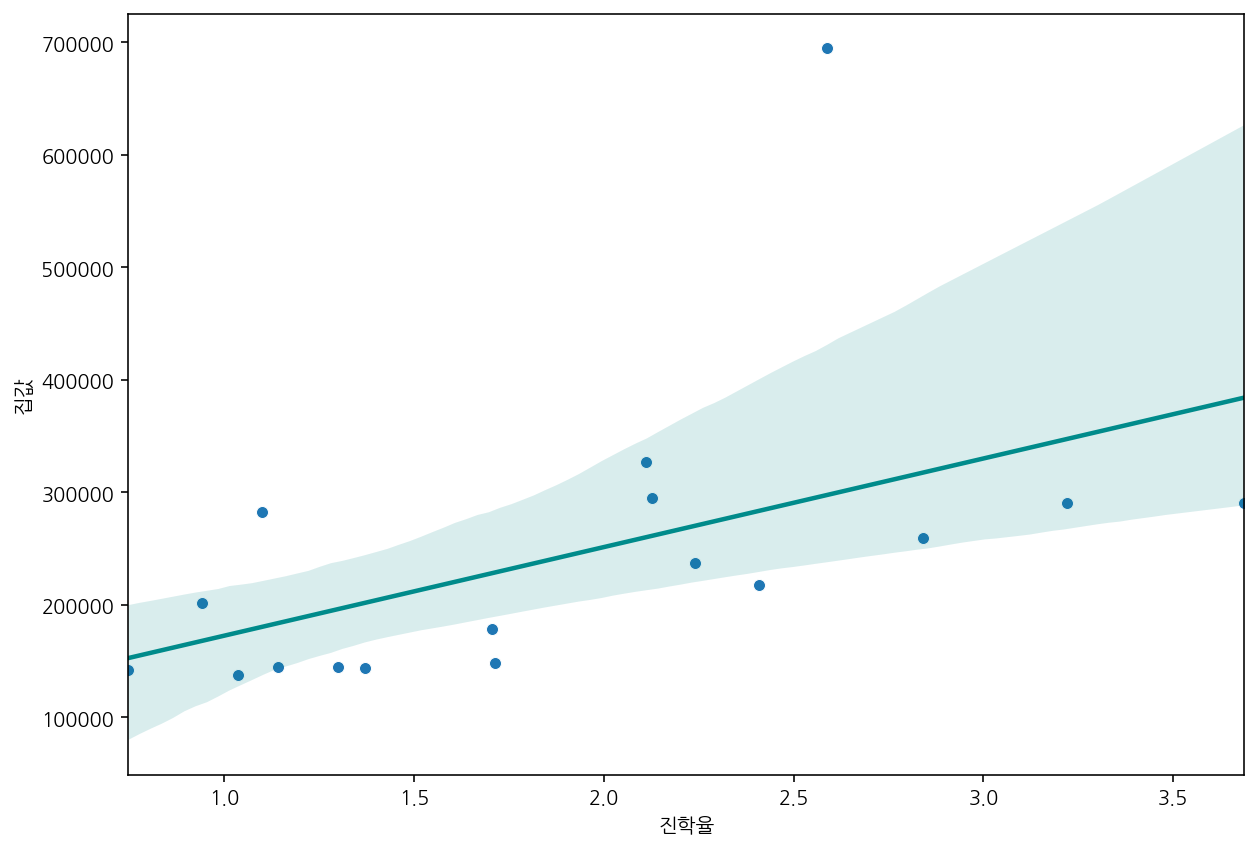

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=sido_data,x="진학율",y="집값")
sns.regplot(sido_data['진학율'],sido_data['집값'],scatter=False,color='darkcyan')#회귀직선 그리느 그래프
#저 영역안으로 들어오면 가설을 만족하는 지역이라고 할 수 있음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


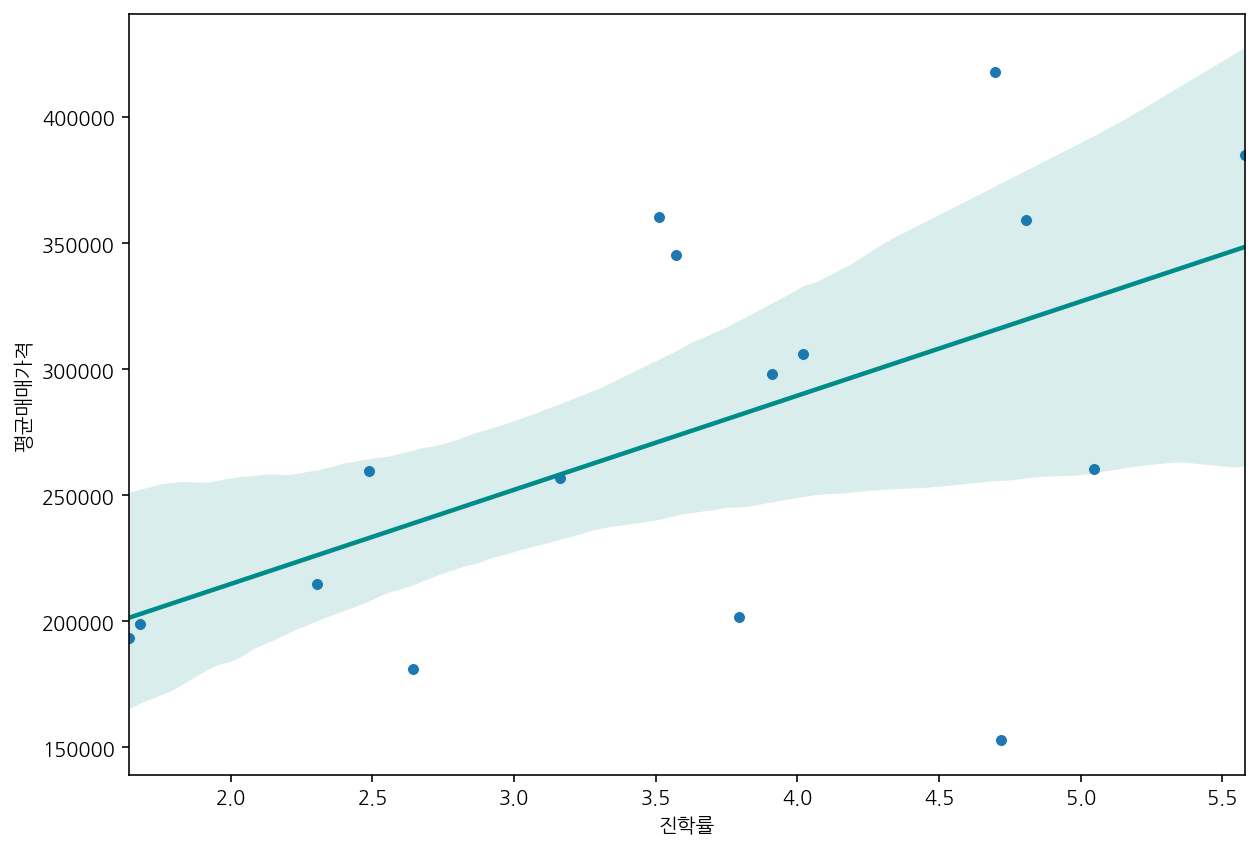

In [ ]:
#부산 데이터
# 부산(혹은 지역)은 어떤가?

local = "부산"

gradu_gu = graduate_data[graduate_data['시도'] == local].groupby('구군').sum()
gradu_gu['진학률'] = gradu_gu['총합'] / gradu_gu['졸업자'] * 100
gradu_gu['평균매매가격'] = house_price.loc['2018-6-1'][local][gradu_gu.index]
gradu_gu['평균매매가격'] = pd.to_numeric(gradu_gu['평균매매가격'])
gradu_gu = gradu_gu.dropna()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=gradu_gu, x="진학률", y="평균매매가격")
sns.regplot(gradu_gu['진학률'], gradu_gu['평균매매가격'], scatter=False, color='darkcyan')
#부산은 대부분 만족한다고 할 수 있음